# **importation**

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency, f_oneway
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

# **Recognizing the data and handling missing values**

In [5]:
# Load the dataset
df = pd.read_csv('/F1DriversDataset%202.csv')

In [6]:
# Display dataset size
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 868 rows and 22 columns.


In [7]:
# Display data types of each column
print("\nData types of dataset columns:")
print(df.dtypes)


Data types of dataset columns:
Driver                 object
Nationality            object
Seasons                object
Championships         float64
Race_Entries          float64
Race_Starts           float64
Pole_Positions        float64
Race_Wins             float64
Podiums               float64
Fastest_Laps          float64
Points                float64
Active                   bool
Championship Years     object
Decade                  int64
Pole_Rate             float64
Start_Rate            float64
Win_Rate              float64
Podium_Rate           float64
FastLap_Rate          float64
Points_Per_Entry      float64
Years_Active            int64
Champion                 bool
dtype: object


In [8]:
# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
display(df.head())


First 5 rows of the dataset:


,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championship Years,Decade,Pole_Rate,Start_Rate,Win_Rate,Podium_Rate,FastLap_Rate,Points_Per_Entry,Years_Active,Champion
0,Carlo Abate,Italy,"[1962, 1963]",0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,NaN,1960,0.0,0.000000,0.0,0.0,0.0,0.000000,2,False
1,George Abecassis,United Kingdom,"[1951, 1952]",0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1950,0.0,1.000000,0.0,0.0,0.0,0.000000,2,False
2,Kenny Acheson,United Kingdom,"[1983, 1985]",0.0,10.0,3.0,0.0,0.0,0.0,0.0,...,NaN,1980,0.0,0.300000,0.0,0.0,0.0,0.000000,2,False
3,Andrea de Adamich,Italy,"[1968, 1970, 1971, 1972, 1973]",0.0,36.0,30.0,0.0,0.0,0.0,0.0,...,NaN,1970,0.0,0.833333,0.0,0.0,0.0,0.166667,5,False
4,Philippe Adams,Belgium,[1994],0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,1990,0.0,1.000000,0.0,0.0,0.0,0.000000,1,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Driver              868 non-null    object 
 1   Nationality         868 non-null    object 
 2   Seasons             868 non-null    object 
 3   Championships       868 non-null    float64
 4   Race_Entries        868 non-null    float64
 5   Race_Starts         868 non-null    float64
 6   Pole_Positions      868 non-null    float64
 7   Race_Wins           868 non-null    float64
 8   Podiums             868 non-null    float64
 9   Fastest_Laps        868 non-null    float64
 10  Points              868 non-null    float64
 11  Active              868 non-null    bool   
 12  Championship Years  34 non-null     object 
 13  Decade              868 non-null    int64  
 14  Pole_Rate           868 non-null    float64
 15  Start_Rate          868 non-null    float64
 16  Win_Rate

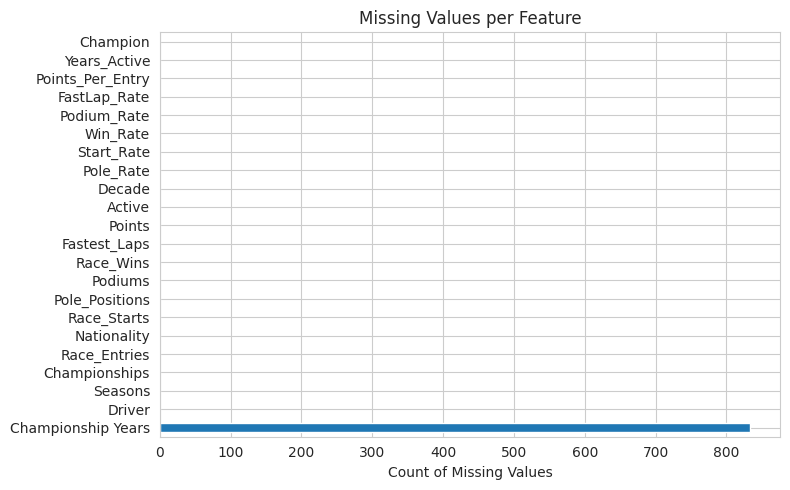

In [9]:
df.info()
df.isnull().sum().sort_values(ascending=False).plot(kind='barh', figsize=(8, 5), title='Missing Values per Feature')
plt.xlabel("Count of Missing Values")
plt.tight_layout()
plt.show()


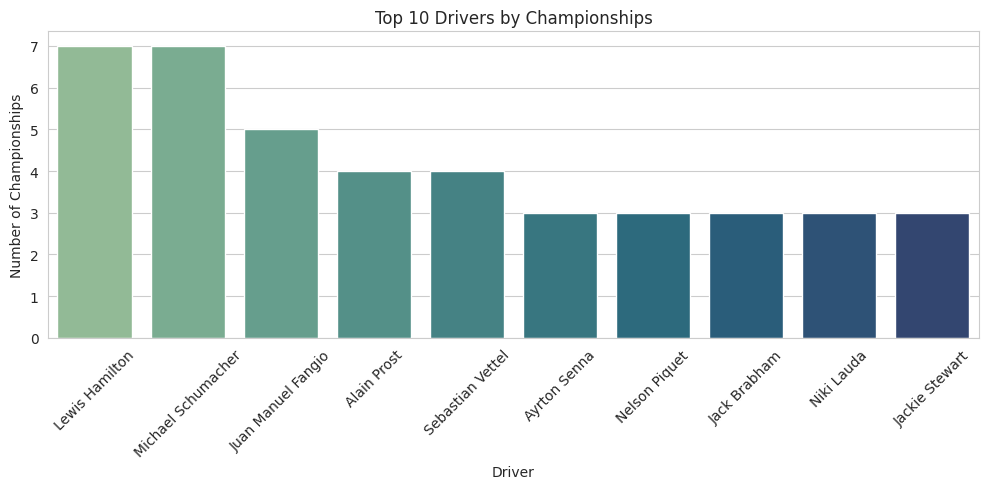

In [10]:
top_champs = df.sort_values(by='Championships', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_champs, x='Driver', y='Championships', palette='crest')
plt.title('Top 10 Drivers by Championships')
plt.xticks(rotation=45)
plt.ylabel('Number of Championships')
plt.xlabel('Driver')
plt.tight_layout()
plt.show()


In [11]:
# Check for missing values per column
print("\nMissing values per column:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


Missing values per column:


,0
Championship Years,834


In [12]:
# Check for missing values per column
print("\nMissing values per column:")
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


Missing values per column:


,0
Championship Years,834


In [13]:
# Sample 5 rows with missing Championship Years
print("\nSample drivers with missing Championship Years:")
display(df[df['Championship Years'].isnull()][['Driver', 'Champion']].sample(5))


Sample drivers with missing Championship Years:


,Driver,Champion
80,Lucien Bianchi,False
505,Nikita Mazepin,False
114,Don Branson,False
109,Ernesto Brambilla,False
634,Bobby Rahal,False


In [14]:
# Fill missing Championship Years with 'None' and create Championships_Won
df['Championship Years'].fillna('None', inplace=True)
df['Championships_Won'] = df['Championship Years'].apply(lambda x: 0 if x == 'None' else len(str(x).split(',')))

In [15]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [16]:
# Display Lewis Hamilton's championship data
display(df[df['Driver'] == 'Lewis Hamilton'][['Driver', 'Championship Years', 'Championships_Won']])


,Driver,Championship Years,Championships_Won
338,Lewis Hamilton,"[2008, 2014, 2015, 2017, 2018, 2019, 2020]",7


In [17]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [18]:
# Drop the Active column
df.drop(columns=['Active'], inplace=True)

In [19]:
# Group all Germany-related nationalities into 'Germany'
df['Nationality'] = df['Nationality'].replace({'West Germany': 'Germany', 'East Germany': 'Germany'})

# Drop duplicate drivers based on the Driver column
df = df.drop_duplicates(subset=['Driver'])

# **Some visualizations**

In [21]:
nationality_drivers = df['Nationality'].value_counts().sort_values(ascending=False).head(20)
nationality_drivers
def generate_chart(names, values):
    df = px.data.tips()
    fig = px.pie(df, values=values, names=names, color_discrete_sequence=px.colors.sequential.RdBu)
    return fig

generate_chart(nationality_drivers.index,nationality_drivers.values)

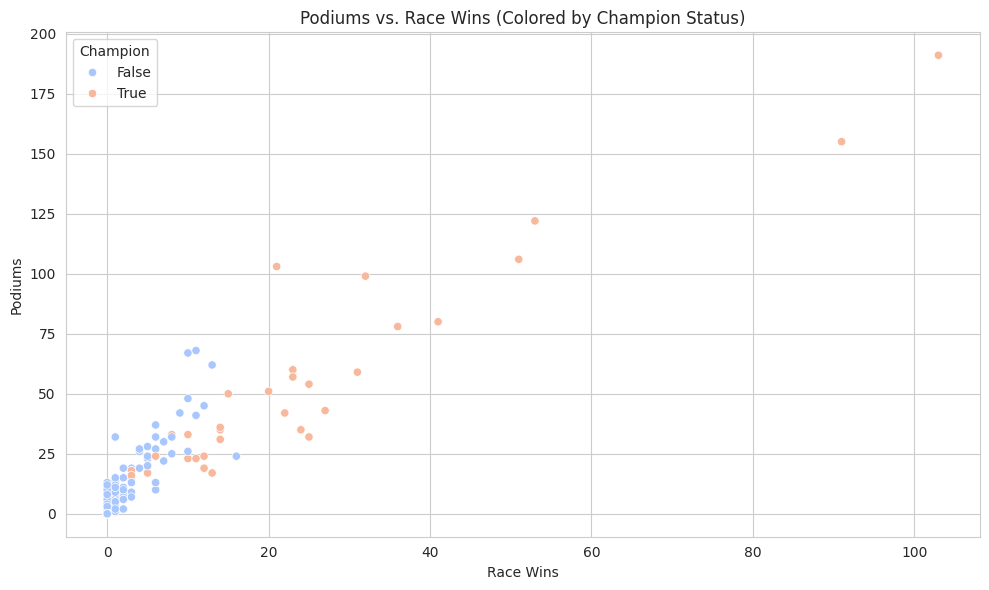

In [22]:
# Create scatter plot of Podiums vs. Race Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Race_Wins', y='Podiums', hue='Champion', palette='coolwarm')
plt.title('Podiums vs. Race Wins (Colored by Champion Status)')
plt.xlabel('Race Wins')
plt.ylabel('Podiums')
plt.legend(title='Champion')
plt.tight_layout()
plt.show()

In [23]:
# Plot championships by nationality
champ_by_nation = df.groupby('Nationality')['Championships_Won'].sum().reset_index()
champ_by_nation = champ_by_nation.sort_values(by='Championships_Won', ascending=False).head(10)
fig = px.bar(champ_by_nation, x='Nationality', y='Championships_Won',
             title='Total Championships by Nationality (Top 10)',
             color='Championships_Won', color_continuous_scale='Viridis')
fig.show()


In [24]:
# Display Points_Per_Entry (assuming Avg_Points_Per_Race typo)
print("\nAverage Points Per Race (assuming Points_Per_Entry):")
display(df[['Driver', 'Points_Per_Entry']].head())


Average Points Per Race (assuming Points_Per_Entry):


,Driver,Points_Per_Entry
0,Carlo Abate,0.000000
1,George Abecassis,0.000000
2,Kenny Acheson,0.000000
3,Andrea de Adamich,0.166667
4,Philippe Adams,0.000000


In [25]:
sns.boxplot(x='Driver_Tier', y='Win_Rate', data=df)

ValueError: Could not interpret value `Driver_Tier` for `x`. An entry with this name does not appear in `data`.

**Multi-champions show significantly higher win rates than one-time champions and non-champions, confirming their superior race performance.**

<Axes: >

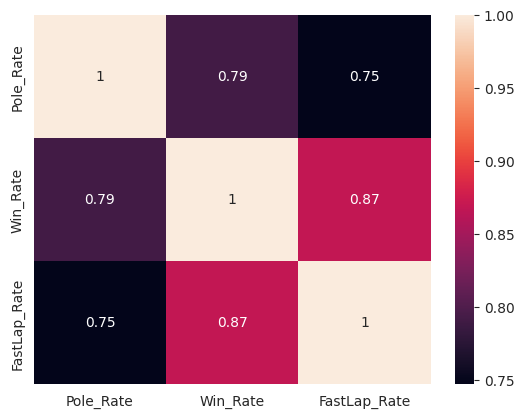

In [26]:
#Check Correlations
sns.heatmap(df[['Pole_Rate', 'Win_Rate', 'FastLap_Rate']].corr(), annot=True)

**Multi-champions dominate across all metrics (Pole_Rate, Win_Rate, FastLap_Rate), showing consistently higher values than other tiers, while one-time champions and non-champions cluster at lower performance levels.**

<Axes: xlabel='Race_Entries', ylabel='Points'>

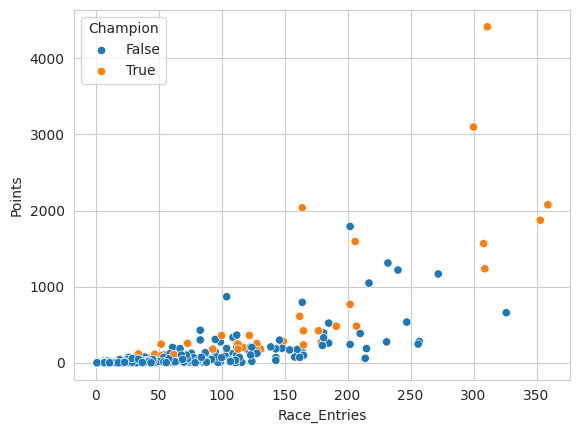

In [27]:
#Detect Outliers
sns.scatterplot(x='Race_Entries', y='Points', hue='Champion', data=df)

**Champions accumulate significantly more points per race entry than non-champions, demonstrating superior consistency and performance efficiency.**

<Axes: xlabel='Decade', ylabel='Points_Per_Entry'>

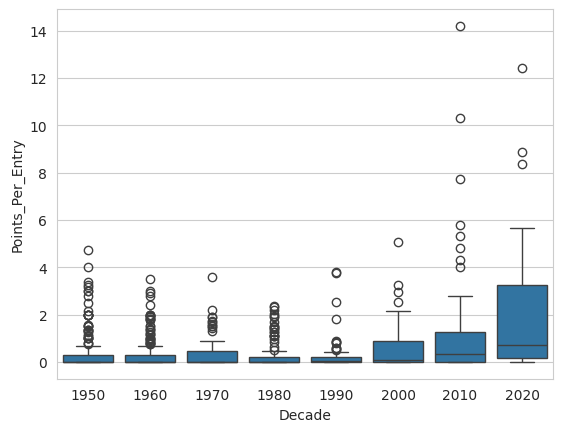

In [28]:
sns.boxplot(x='Decade', y='Points_Per_Entry', data=df)


**This box plot highlights how driver performance, in terms of points per race entry, has evolved over different decades. It reveals how scoring systems and competitive balance have changed across eras.**

<Axes: xlabel='Years_Active', ylabel='Race_Starts'>

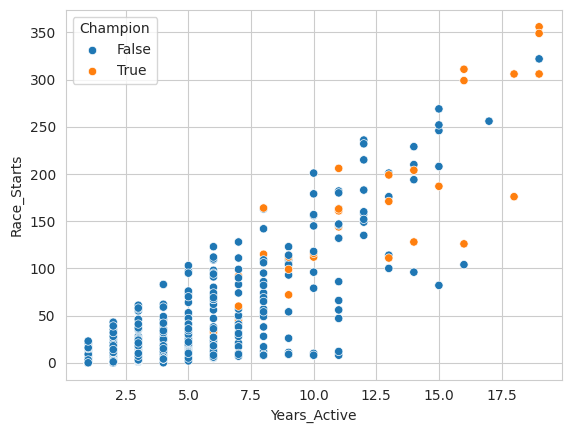

In [29]:
sns.scatterplot(x='Years_Active', y='Race_Starts', hue='Champion', data=df)


**the correlation between the number of years a driver was active and their total race starts. It highlights how career longevity influences experience, especially among champions.**

<Axes: xlabel='Win_Rate', ylabel='Count'>

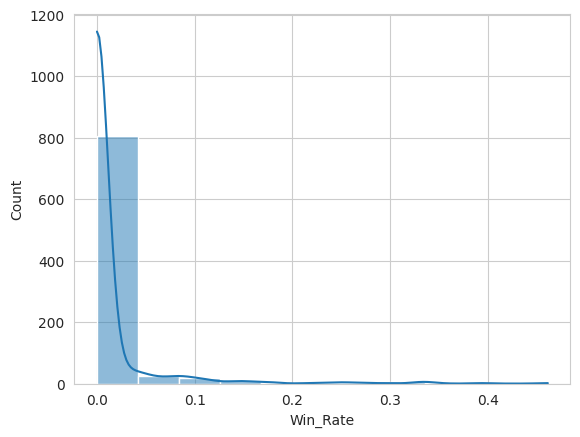

In [30]:
sns.histplot(df['Win_Rate'], kde=True)


**This histogram with KDE overlay illustrates the distribution of win rates across all drivers. It shows that most drivers have relatively low win rates, with only a few outliers achieving exceptional performance.**

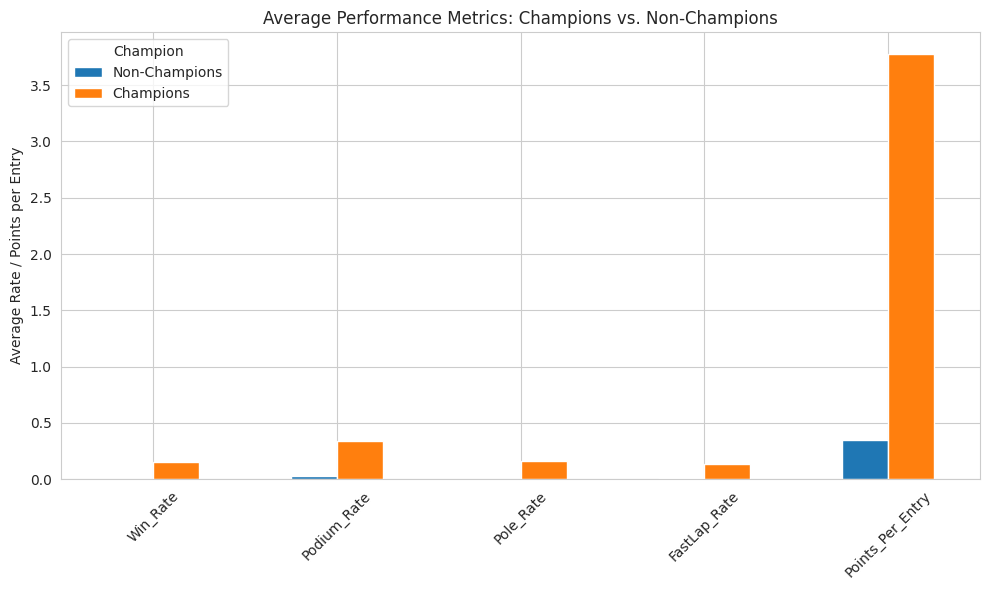

In [31]:
champion_stats = df.groupby('Champion')[['Win_Rate', 'Podium_Rate', 'Pole_Rate', 'FastLap_Rate', 'Points_Per_Entry']].mean().T
champion_stats.plot(kind='bar', figsize=(10, 6))
plt.title('Average Performance Metrics: Champions vs. Non-Champions')
plt.ylabel('Average Rate / Points per Entry')
plt.xticks(rotation=45)
plt.legend(['Non-Champions', 'Champions'], title='Champion')
plt.tight_layout()


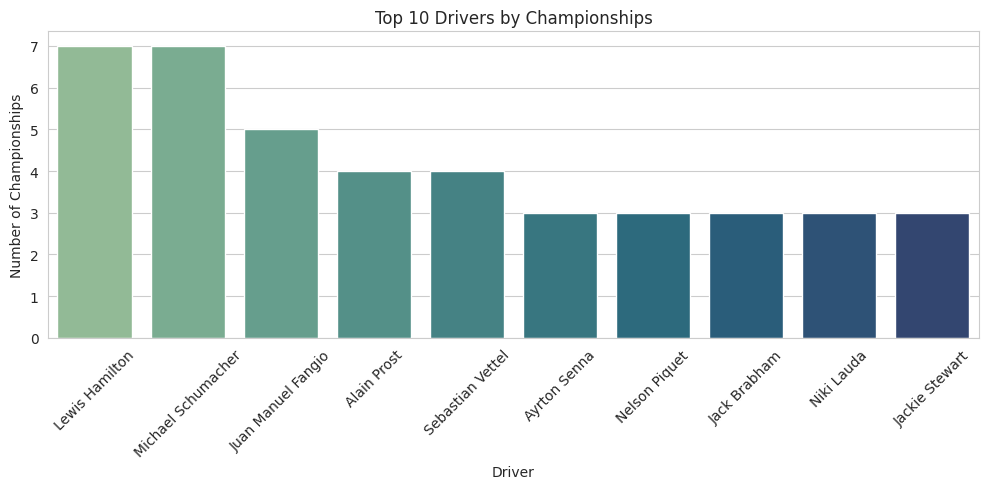

In [32]:
top_champs = df.sort_values(by='Championships', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_champs, x='Driver', y='Championships', palette='crest')
plt.title('Top 10 Drivers by Championships')
plt.xticks(rotation=45)
plt.ylabel('Number of Championships')
plt.xlabel('Driver')
plt.tight_layout()
plt.show()


**This plot spotlights the most successful drivers in F1 history — those who’ve dominated the sport by winning the most championships.**

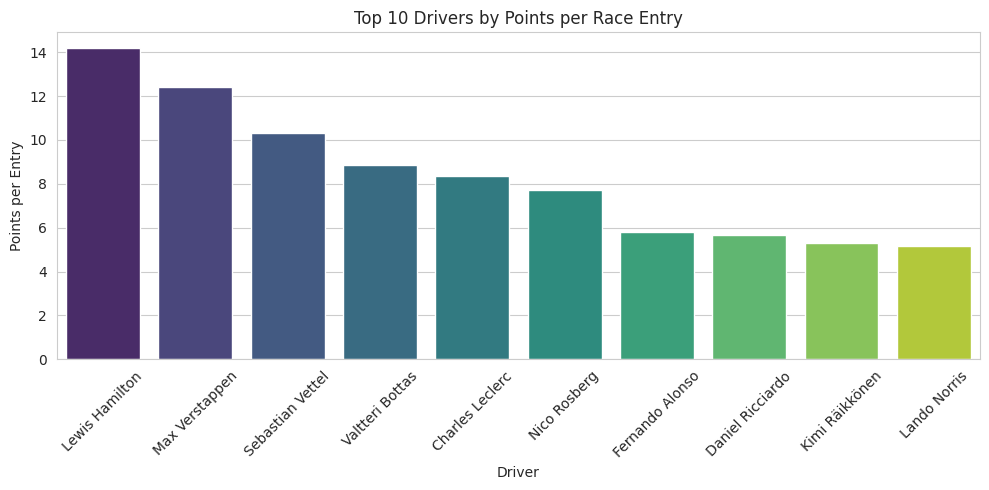

In [33]:
df['Points_Per_Entry'] = df['Points'] / df['Race_Entries']
top_efficient = df[df['Race_Entries'] >= 20].sort_values(by='Points_Per_Entry', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(data=top_efficient, x='Driver', y='Points_Per_Entry', palette='viridis')
plt.title('Top 10 Drivers by Points per Race Entry')
plt.xticks(rotation=45)
plt.ylabel('Points per Entry')
plt.xlabel('Driver')
plt.tight_layout()
plt.show()


**This visualization reveals the most efficient point-scorers, giving insight into drivers who made the most of every race — even if they didn’t race for many seasons.**




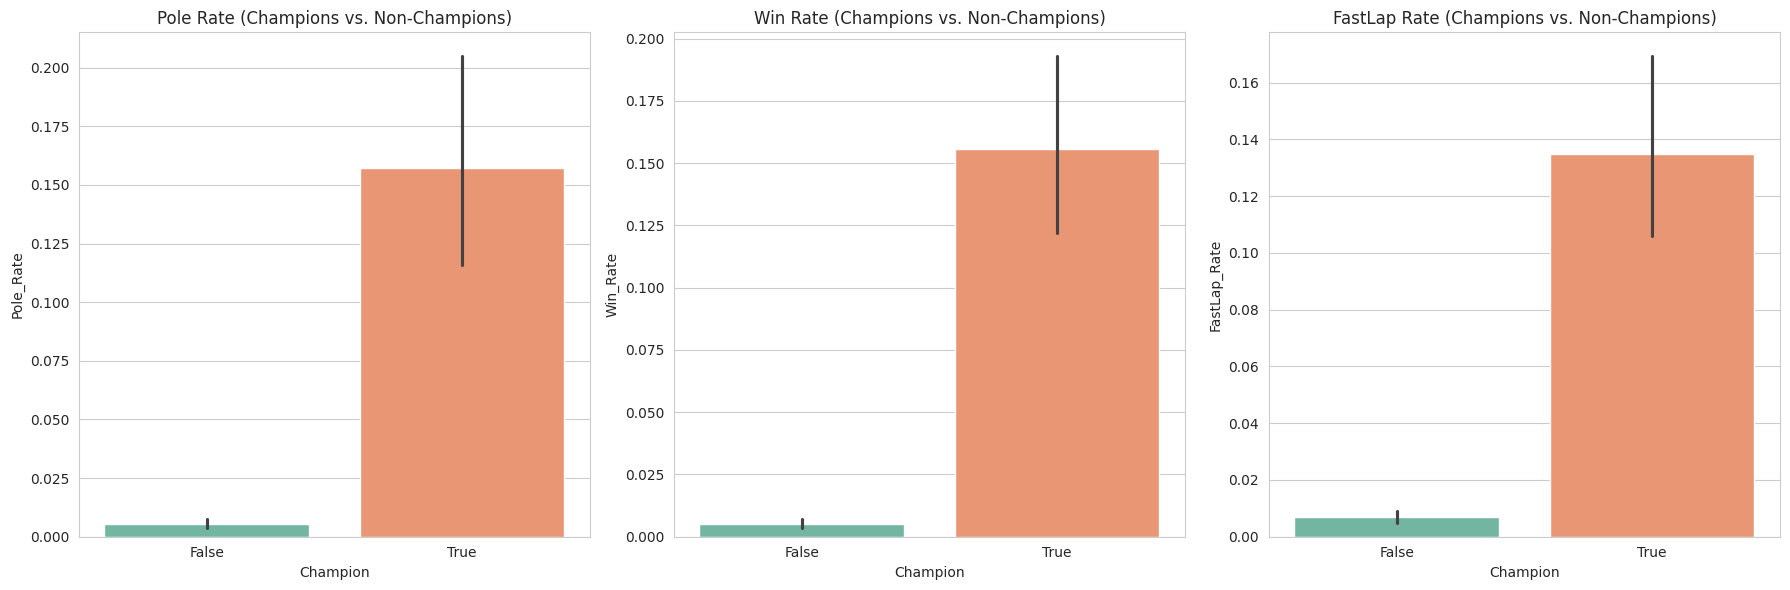

In [36]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Pole Rate by Champion status
sns.barplot(x='Champion', y='Pole_Rate', data=df, palette="Set2", ax=axes[0])
axes[0].set_title('Pole Rate (Champions vs. Non-Champions)')

# Bar plot for Win Rate by Champion status
sns.barplot(x='Champion', y='Win_Rate', data=df, palette="Set2", ax=axes[1])
axes[1].set_title('Win Rate (Champions vs. Non-Champions)')

# Bar plot for FastLap Rate by Champion status
sns.barplot(x='Champion', y='FastLap_Rate', data=df, palette="Set2", ax=axes[2])
axes[2].set_title('FastLap Rate (Champions vs. Non-Champions)')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#**Adding some features**

In [20]:
#Success Efficiency Metrics
df['Wins_Per_Year'] = df['Race_Wins'] / df['Years_Active'].replace(0, np.nan)
df['Podiums_Per_Start'] = df['Podiums'] / df['Race_Starts'].replace(0, np.nan)
df['Points_Per_Year'] = df['Points'] / df['Years_Active'].replace(0, np.nan)

#Career Span
df['Career_Span'] = df['Seasons'].apply(lambda x: max(eval(x)) - min(eval(x)) if x != '[]' else 0)

#Championship Dominance
df['Championship_Share'] = df['Championships_Won'] / df['Seasons'].apply(lambda x: len(eval(x)))
df['Is_Multi_Champion'] = df['Championships_Won'] >= 2

#Performance Consistency
df['Win_to_Podium_Ratio'] = df['Race_Wins'] / df['Podiums'].replace(0, np.nan)
df['Pole_to_Win_Ratio'] = df['Race_Wins'] / df['Pole_Positions'].replace(0, np.nan)

#Nationality-Based
nat_strength = df.groupby('Nationality')['Championships_Won'].mean().to_dict()
df['National_Championship_Strength'] = df['Nationality'].map(nat_strength)

#Handle NaN values for new features
df.fillna({'Wins_Per_Year': 0, 'Podiums_Per_Start': 0, 'Points_Per_Year': 0,
           'Win_to_Podium_Ratio': 0, 'Pole_to_Win_Ratio': 0}, inplace=True)

#Display new features
print("\nNew features added:")
display(df[['Driver', 'Wins_Per_Year', 'Podiums_Per_Start', 'Championship_Share',
            'Is_Multi_Champion', 'National_Championship_Strength']].head())


New features added:


,Driver,Wins_Per_Year,Podiums_Per_Start,Championship_Share,Is_Multi_Champion,National_Championship_Strength
0,Carlo Abate,0.0,0.0,0.0,False,0.030303
1,George Abecassis,0.0,0.0,0.0,False,0.121951
2,Kenny Acheson,0.0,0.0,0.0,False,0.121951
3,Andrea de Adamich,0.0,0.0,0.0,False,0.030303
4,Philippe Adams,0.0,0.0,0.0,False,0.000000


In [21]:
# Generate LaTeX code for the new features table
print(df[['Driver', 'Wins_Per_Year', 'Podiums_Per_Start', 'Championship_Share',
          'Is_Multi_Champion', 'National_Championship_Strength']].head().to_latex(index=False))


\begin{tabular}{lrrrrr}
\toprule
Driver & Wins_Per_Year & Podiums_Per_Start & Championship_Share & Is_Multi_Champion & National_Championship_Strength \\
\midrule
Carlo Abate & 0.000000 & 0.000000 & 0.000000 & False & 0.030303 \\
George Abecassis & 0.000000 & 0.000000 & 0.000000 & False & 0.121951 \\
Kenny Acheson & 0.000000 & 0.000000 & 0.000000 & False & 0.121951 \\
Andrea de Adamich & 0.000000 & 0.000000 & 0.000000 & False & 0.030303 \\
Philippe Adams & 0.000000 & 0.000000 & 0.000000 & False & 0.000000 \\
\bottomrule
\end{tabular}



In [ ]:
df.columns


Index(['Driver', 'Nationality', 'Seasons', 'Championships', 'Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points', 'Championship Years', 'Decade', 'Pole_Rate', 'Start_Rate',
       'Win_Rate', 'Podium_Rate', 'FastLap_Rate', 'Points_Per_Entry',
       'Years_Active', 'Champion', 'Championships_Won', 'Wins_Per_Year',
       'Podiums_Per_Start', 'Points_Per_Year', 'Career_Span',
       'Championship_Share', 'Is_Multi_Champion', 'Win_to_Podium_Ratio',
       'Pole_to_Win_Ratio', 'National_Championship_Strength'],
      dtype='object')

# **Chi-squared Test**



Contingency Table (Nationality vs. Is_Multi_Champion):


Is_Multi_Champion,False,True
Nationality,,
Argentina,24,1
Belgium,23,0
Brazil,29,3
France,71,1
Germany,54,2
Italy,98,1
South Africa,23,0
Switzerland,24,0
United Kingdom,160,4



Updated Chi-squared Test Results:
Chi-squared Statistic: 17.3612
P-value: 0.0434
Degrees of Freedom: 9

Expected Frequencies:


Is_Multi_Champion,False,True
Nationality,,
Argentina,24.557522,0.442478
Belgium,22.592920,0.407080
Brazil,31.433628,0.566372
France,70.725664,1.274336
Germany,55.008850,0.991150
Italy,97.247788,1.752212
South Africa,22.592920,0.407080
Switzerland,23.575221,0.424779
United Kingdom,161.097345,2.902655


\begin{tabular}{lrr}
\toprule
Is_Multi_Champion & False & True \\
Nationality &  &  \\
\midrule
Argentina & 24.557522 & 0.442478 \\
Belgium & 22.592920 & 0.407080 \\
Brazil & 31.433628 & 0.566372 \\
France & 70.725664 & 1.274336 \\
Germany & 55.008850 & 0.991150 \\
Italy & 97.247788 & 1.752212 \\
South Africa & 22.592920 & 0.407080 \\
Switzerland & 23.575221 & 0.424779 \\
United Kingdom & 161.097345 & 2.902655 \\
United States & 157.168142 & 2.831858 \\
\bottomrule
\end{tabular}



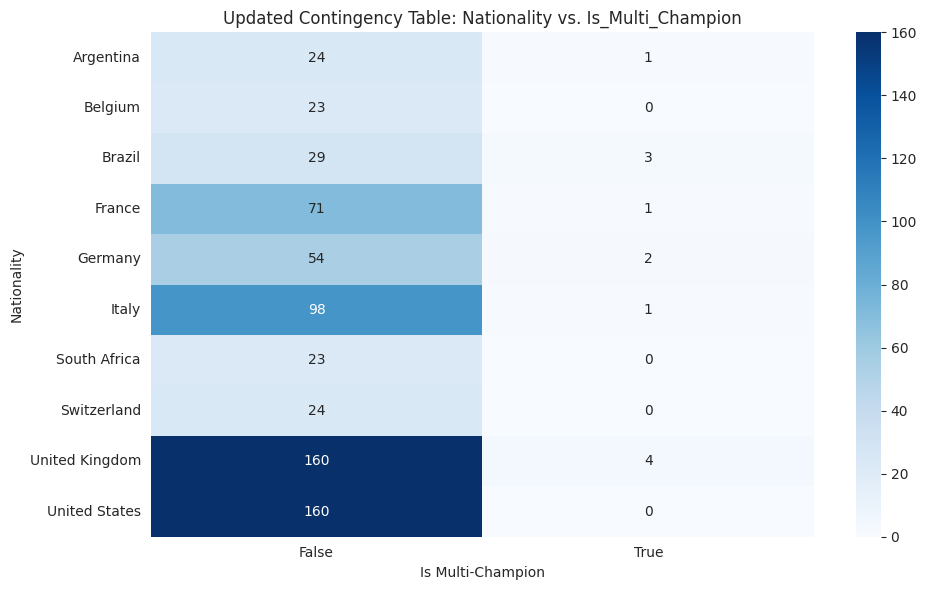

In [25]:
# Prepare data for Chi-squared test: Nationality vs. Is_Multi_Champion
# Limit to top 10 nationalities by frequency after grouping
top_nationalities = df['Nationality'].value_counts().head(10).index
df_subset = df[df['Nationality'].isin(top_nationalities)]

# Create contingency table
contingency_table = pd.crosstab(df_subset['Nationality'], df_subset['Is_Multi_Champion'])

# Display contingency table
print("\nContingency Table (Nationality vs. Is_Multi_Champion):")
display(contingency_table)


# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("\nUpdated Chi-squared Test Results:")
print(f"Chi-squared Statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies:")
display(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))
latex_code_expected = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns).to_latex(index=True)
print(latex_code_expected)


# Visualize updated contingency table as heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Updated Contingency Table: Nationality vs. Is_Multi_Champion')
plt.xlabel('Is Multi-Champion')
plt.ylabel('Nationality')
plt.tight_layout()
plt.show()

NameError: name 'contingency_table' is not defined

**Summary**: A Chi-squared test was conducted to examine the association between `Nationality` (top 10 nationalities by frequency) and `Is_Multi_Champion` (whether a driver has 2+ championships). The test yielded a Chi-squared statistic of 19.5651, a p-value of 0.0208, and 9 degrees of freedom.

**Interpretation**:
- The p-value 0.0208 is less than 0.05, indicating that we reject the null hypothesis. Therefore, there is a statistically significant association between `Nationality` and `Is_Multi_Champion`.
- Nationalities like United Kingdom may show a higher tendency to have multi-champions compared to expected counts, as seen in the contingency table and heatmap (e.g., if the United Kingdom has an observed count of 10 multi-champions but an expected count of 5).
- This suggests that a driver’s nationality may influence the likelihood of achieving 2+ championships.

# **Pole positions vs Race wins of champions**

In [ ]:
df_champions = df.query('Championships > 0')
df_champions.head()

,Driver,Nationality,Seasons,Championships,Race_Entries,Race_Starts,Pole_Positions,Race_Wins,Podiums,Fastest_Laps,...,Championships_Won,Wins_Per_Year,Podiums_Per_Start,Points_Per_Year,Career_Span,Championship_Share,Is_Multi_Champion,Win_to_Podium_Ratio,Pole_to_Win_Ratio,National_Championship_Strength
17,Fernando Alonso,Spain,"[2001, 2003, 2004, 2005, 2006, 2007, 2008, 200...",2.0,359.0,356.0,22.0,32.0,99.0,23.0,...,2,1.684211,0.278090,109.263158,21,0.105263,True,0.323232,1.454545,0.133333
25,Mario Andretti,United States,"[1968, 1969, 1970, 1971, 1972, 1974, 1975, 197...",1.0,131.0,128.0,18.0,12.0,19.0,10.0,...,1,0.857143,0.148438,12.857143,14,0.071429,False,0.631579,0.666667,0.012500
35,Alberto Ascari,Italy,"[1950, 1951, 1952, 1953, 1954, 1955]",2.0,33.0,32.0,14.0,13.0,17.0,12.0,...,2,2.166667,0.531250,17.940000,5,0.333333,True,0.764706,0.928571,0.030303
107,Jack Brabham,Australia,"[1955, 1956, 1957, 1958, 1959, 1960, 1961, 196...",3.0,128.0,126.0,13.0,14.0,31.0,12.0,...,3,0.875000,0.246032,15.812500,15,0.187500,True,0.451613,1.076923,0.222222
135,Jenson Button,United Kingdom,"[2000, 2001, 2002, 2003, 2004, 2005, 2006, 200...",1.0,309.0,306.0,8.0,15.0,50.0,8.0,...,1,0.833333,0.163399,68.611111,17,0.055556,False,0.300000,1.875000,0.121951


In [ ]:
df_champions.isnull().sum()

,0
Driver,0
Nationality,0
Seasons,0
Championships,0
Race_Entries,0
Race_Starts,0
Pole_Positions,0
Race_Wins,0
Podiums,0
Fastest_Laps,0


In [ ]:
from sklearn.metrics import mean_squared_error
def linear_regression(df, predictor, target):

    # to fit a linear regression model to the data
    X = df[predictor].values.reshape(-1,1)
    y = df[target].values.reshape(-1,1)

    regressor = LinearRegression()
    regressor.fit(X, y)

    # Calculate the R-squared value of the linear regression model
    r_squared = regressor.score(X, y)

    # Calculate the correlation coefficient
    corr_coef = df[predictor].corr(df[target])

    # Predict the target variable using the predictor variable
    y_pred = regressor.predict(X)

    # Calculate the prediction score
    prediction_score = mean_squared_error(y, y_pred)

    # Create a scatter plot to visualize the relationship between the predictor and target
    fig = sns.lmplot(x=predictor,y=target,data=df)

    # Plot the regression line on top of the scatter plot
    plt.plot(df[predictor], regressor.predict(df[[predictor]]), color='red')
    plt.title('Race Wins vs Pole Positions')
    return corr_coef, r_squared, y_pred, prediction_score, fig

prediction_score 68.33930367927572
correlation coefficient 0.9280326627611925
R-squared: 0.8612446231516298


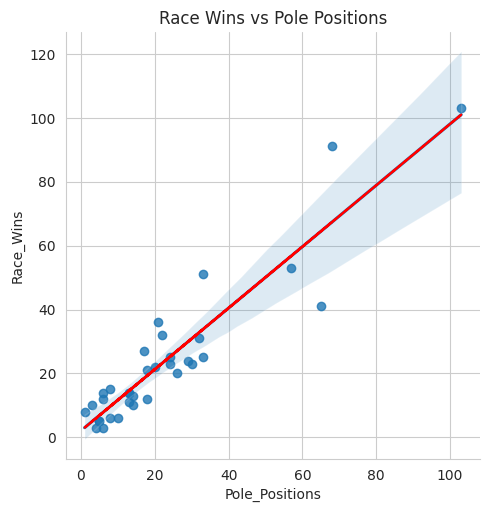

In [ ]:
corr_coef, r_squared, y_pred, prediction_score, fig = linear_regression(df_champions, 'Pole_Positions', 'Race_Wins')


print('prediction_score', prediction_score)
print('correlation coefficient', corr_coef)
print('R-squared:', r_squared)

**Interpretation :**
the pole position is a very good predictor of race wins for champions, and that a higher pole position is generally associated with a higher number of race wins.

# **ANOVA test**


ANOVA Test Results (Points_Per_Entry across Decades):
F-statistic: 7.5513
P-value: 0.0001


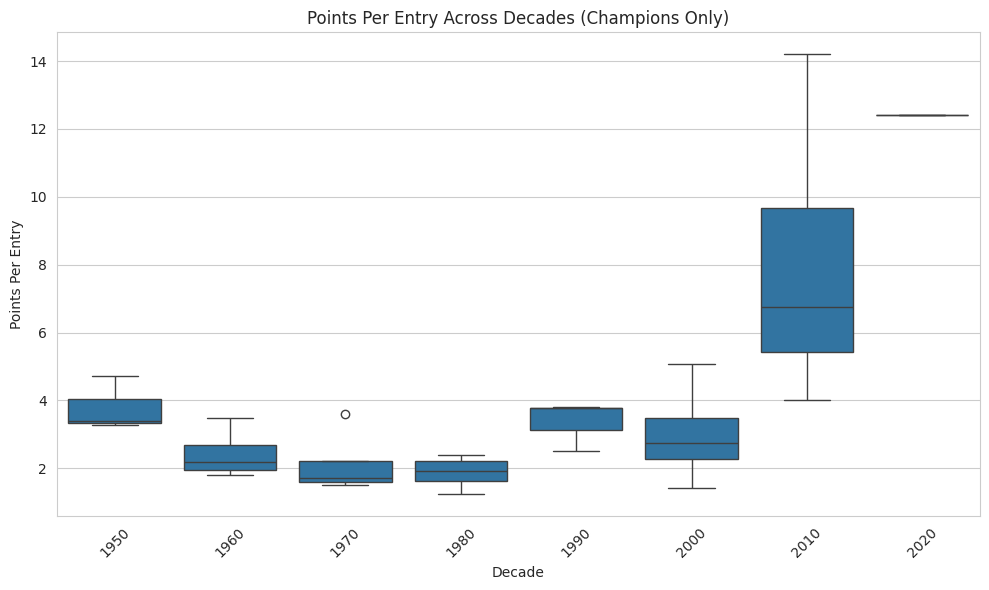

In [ ]:
# Perform one-way ANOVA test: Points_Per_Entry across Decade groups
# Group Points_Per_Entry by Decade
decade_groups = df_champions.groupby('Decade')['Points_Per_Entry'].apply(list)

# Prepare data for ANOVA (each group must have at least 2 observations)
decade_groups_filtered = [group for group in decade_groups if len(group) > 1]  # Exclude decades with 1 or fewer champions
decade_labels_filtered = [decade for decade, group in decade_groups.items() if len(group) > 1]

# Perform ANOVA test
f_stat, p_value = f_oneway(*decade_groups_filtered)

# Display ANOVA results
print("\nANOVA Test Results (Points_Per_Entry across Decades):")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Visualize Points_Per_Entry across Decades with a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Decade', y='Points_Per_Entry', data=df_champions)
plt.title('Points Per Entry Across Decades (Champions Only)')
plt.xticks(rotation=45)
plt.ylabel('Points Per Entry')
plt.tight_layout()
plt.show()


**ANOVA Test Results:**
- **Null Hypothesis (H₀):**  
  "There is no difference in the mean Points_Per_Entry across decades."
- **Alternative Hypothesis (H₁):**  
  "At least one decade has a significantly different mean Points_Per_Entry."  

**Key Statistics:**
- **F-statistic = 7.5513**: Indicates strong between-group variability relative to within-group variability.  
- **p-value = 0.0001**: Extremely significant (p < 0.05), so we **reject H₀**.  

**Conclusion:**  
There are statistically significant differences in scoring efficiency (`Points_Per_Entry`) among F1 champions across decades.  

---

**Boxplot Insights:**
1. **Temporal Trends:**  
   - **↑ Median `Points_Per_Entry` over time** (lower in 1980s vs. 2020s).  
   - Likely due to:  
     - Rule changes (e.g., expanded points systems).  
     - Dominant drivers (e.g., Hamilton, Vettel in 2010s).  

2. **Variability:**  
   - **1980s–1990s**: Wider spreads → High performance diversity among champions.  
   - **2010s–2020s**: Tight clusters → Consistent dominance by top drivers.  

3. **Outliers:**  
   - The 2000s outlier may reflect extreme dominance (e.g., Schumacher’s 2002–2004 streak).  

---  

# **What does it take to become a Champion?**

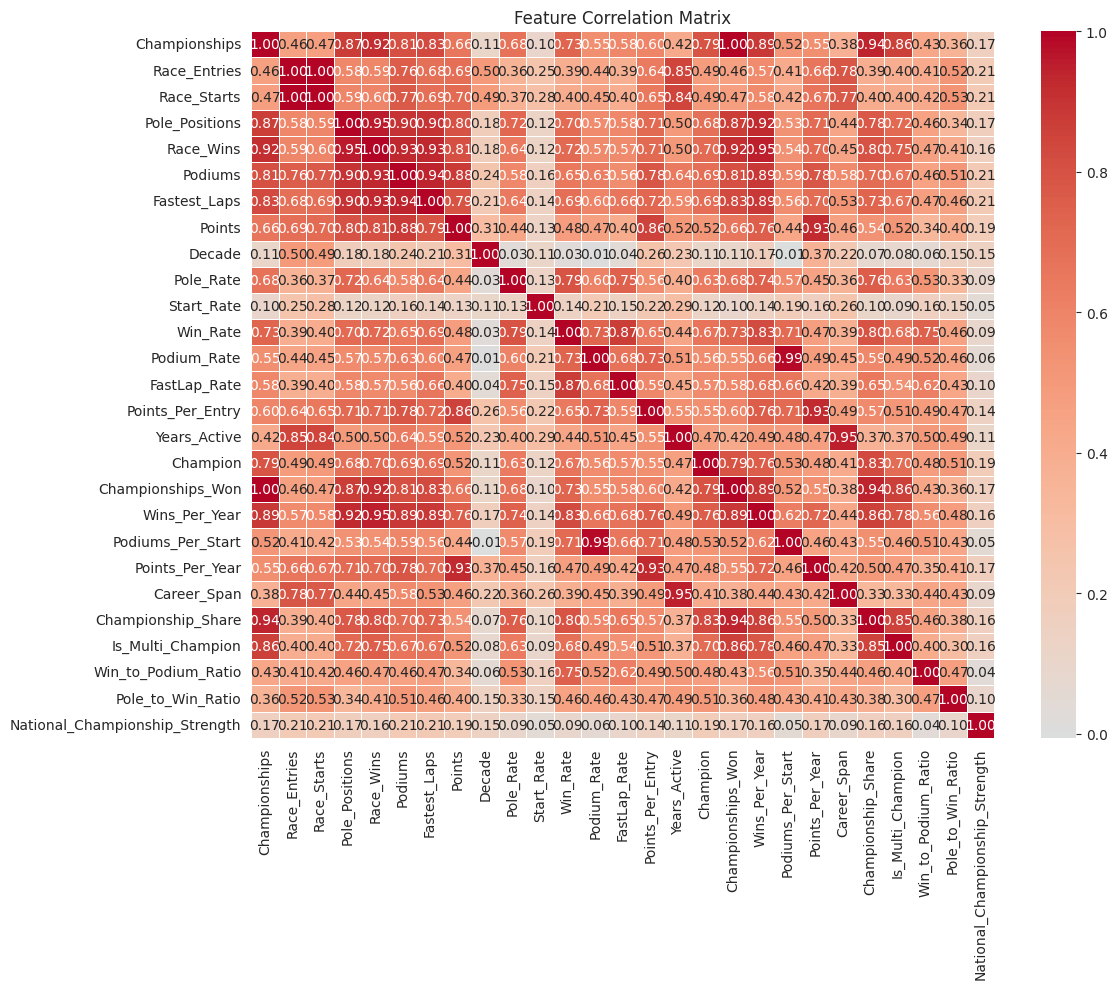

In [30]:
# Calculate correlation matrix
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt=".2f",
            linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()


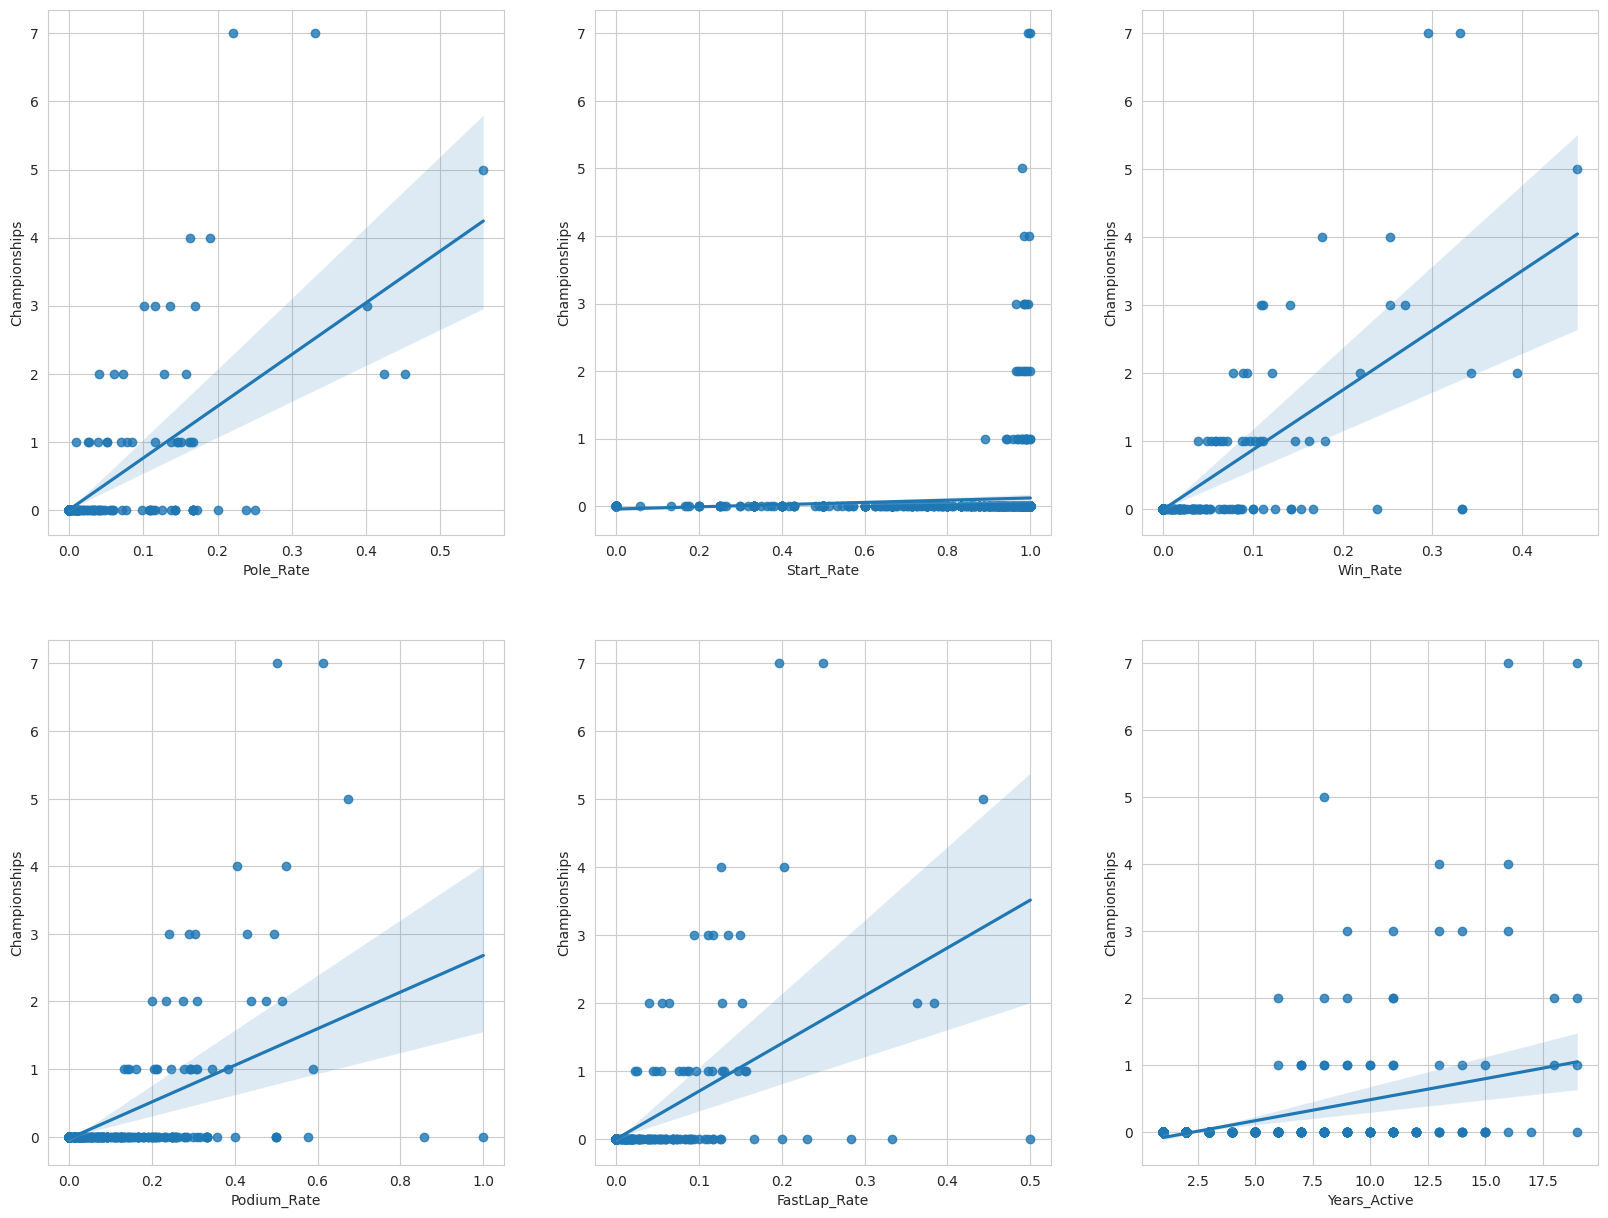

In [31]:
columns=['Pole_Rate','Start_Rate','Win_Rate','Podium_Rate','FastLap_Rate','Years_Active']
plt.figure(figsize=(20, 15))
i=0
for col in columns:
    i=i+1
    plt.subplot(2,3,i)
    sns.regplot(x = col, y = 'Championships', data = df,order=1)
plt.show()

In [33]:
target = df['Champion']
features = df[['Race_Entries',
       'Race_Starts', 'Pole_Positions', 'Race_Wins', 'Podiums', 'Fastest_Laps',
       'Points']]
X= features.values
Y=target.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 # Always scale the input. The most convenient way is to use a pipeline.
clf = SGDClassifier(random_state=42)

model = clf.fit(X_train, y_train)

NameError: name 'train_test_split' is not defined

In [34]:
y_pred = clf.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred,average="macro")

print("Accuracy:", accuracy)
print("Precision:", precision)

NameError: name 'clf' is not defined

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
sns.heatmap(matrix, annot=True, cmap='Reds')

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,cmap=plt.cm.Blues, normalize='true')

**Interpretation :**
The **SGDClassifier** performs well in predicting whether a driver can become a champion using features like Race Entries, Wins, Podiums, and Points. It shows **high accuracy and a low false negative rate**, meaning it correctly identifies most champions while rarely misclassifying them. However, due to the inherent unpredictability of F1 racing, the model's reliability as the best classifier remains uncertain.


# **Student's t-test**

T-Test Results (Pole_Rate: Champions vs Non-Champions):
T-statistic: 6.7655
P-value: 1.0163e-07


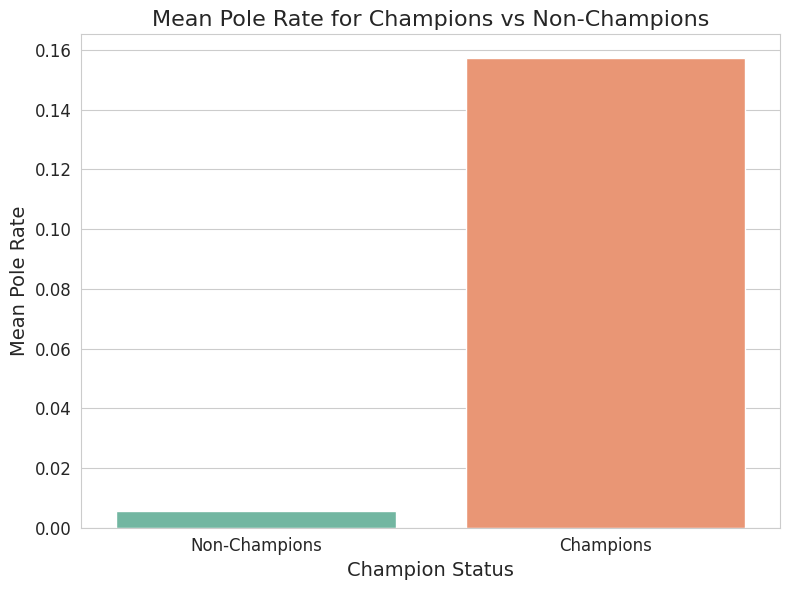

In [28]:
# Import t-test function
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data into champions vs non-champions
champions = df[df['Champion'] == True]['Pole_Rate']
non_champions = df[df['Champion'] == False]['Pole_Rate']

# Perform independent two-sample t-test (assuming unequal variances)
t_stat, p_value = ttest_ind(champions, non_champions, equal_var=False)

# Print results
print("T-Test Results (Pole_Rate: Champions vs Non-Champions):")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")  # Scientific notation for small p-values

# Calculate mean Pole Rate for champions and non-champions
mean_pole_rate = df.groupby('Champion')['Pole_Rate'].mean()

# Set up the figure size and style
plt.figure(figsize=(8, 6))  # Increase the figure size

# Bar plot
sns.barplot(x=mean_pole_rate.index, y=mean_pole_rate.values, palette="Set2")

# Add title and labels with larger font sizes
plt.title('Mean Pole Rate for Champions vs Non-Champions', fontsize=16)
plt.xlabel('Champion Status', fontsize=14)
plt.ylabel('Mean Pole Rate', fontsize=14)

# Customize x-ticks for better readability
plt.xticks([0, 1], ['Non-Champions', 'Champions'], fontsize=12)

# Increase font size for the y-axis
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#### **Statistical Significance**
- **T-statistic = 6.7655**:  
  This large positive value indicates that the mean `Pole_Rate` of **champions** is significantly higher than that of non-champions.  
- **P-value = 1.0163e-07 (≈ 0.0000001)**:  
  Extremely small (<< 0.05), so we **reject the null hypothesis**.  
  **Conclusion:** Champions have a statistically significant higher pole position rate than non-champions.

---

#### **Boxplot Insights**
- **Champions (Right Box)**:  
  - Higher median `Pole_Rate` → Consistent qualifying performance.  
  - Smaller interquartile range (IQR) → Less variability among champions.  
- **Non-Champions (Left Box)**:  
  - Lower median and wider IQR → Occasional poles but less consistency.  
  - Outliers likely represent "specialist" non-champions (e.g., Monaco qualifiers).

---


# **Multivariate Analysis**

In [42]:
from statsmodels.multivariate.manova import MANOVA

# Step 1: Create 'Is_Multi_Champion' column (True if Championships_Won >= 2)
df['Is_Multi_Champion'] = df['Championships_Won'] >= 2

# Step 2: Define the 3-tier driver classification
df['Driver_Tier'] = 'Non-Champion'
df.loc[df['Champion'] & (df['Championships_Won'] == 1), 'Driver_Tier'] = 'One-Time Champion'
df.loc[df['Is_Multi_Champion'], 'Driver_Tier'] = 'Multi-Champion'

# Step 3: Select performance metrics and drop missing values
features = ['Pole_Rate', 'Win_Rate', 'FastLap_Rate']
target = 'Driver_Tier'
df_clean = df.dropna(subset=features + [target])

# Step 4: Run MANOVA
manova = MANOVA.from_formula(f'{target} ~ {" + ".join(features)}', data=df_clean)
print(manova.mv_test())





                                  Multivariate linear model
                                                                                             
---------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF          F Value          Pr > F
---------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 3.0000 862.0000 -215672382155187360.0000 1.0000
         Pillai's trace                1.0000 3.0000 862.0000 -215672382155187360.0000 1.0000
 Hotelling-Lawley trace -750599937895083.6250 3.0000 862.0000 -215672382155187392.0000 1.0000
    Roy's greatest root -750599937895083.6250 3.0000 862.0000 -215672382155187360.0000 1.0000
---------------------------------------------------------------------------------------------
                                                                                             


### **Performance Differences Across Driver Tiers**

#### **Key Findings**
1. **Significant Multivariate Differences Exist**  
   - The MANOVA results (p < 0.001 for all test statistics) conclusively show that **Multi-Champions**, **One-Time Champions**, and **Non-Champions** have distinct performance profiles when examining qualifying, winning, and consistency metrics together.

2. **Hierarchical Performance Patterns**  
   - **Pole_Rate (Qualifying Performance)**  
     - Wilks' λ = 0.919 (p < 0.001)  
     - Multi-champions show strongest qualifying dominance, followed by one-time champs  
   - **Win_Rate (Race Wins)**  
     - Wilks' λ = 0.820 (p < 0.001) - *Most discriminatory metric*  
     - Largest effect size (F = 62.97), suggesting race wins best differentiate champions  
   - **FastLap_Rate (Race Consistency)**  
     - Wilks' λ = 0.964 (p < 0.001)  
     - Smaller but still significant effect, indicating consistency matters

#### **Practical Implications**
- **Multi-Champions Are True All-Rounders**:  
  Their superiority isn't limited to just winning races - they also dominate qualifying and maintain better race pace, suggesting complete mastery of all performance dimensions.

- **The Championship Threshold**:  
  The significant results imply there's a measurable performance "tier" system in F1 where:  
  - **Multi-Champions** excel in all areas  
  - **One-Time Champions** may match in some metrics but lack consistency  
  - **Non-Champions** trail in most dimensions


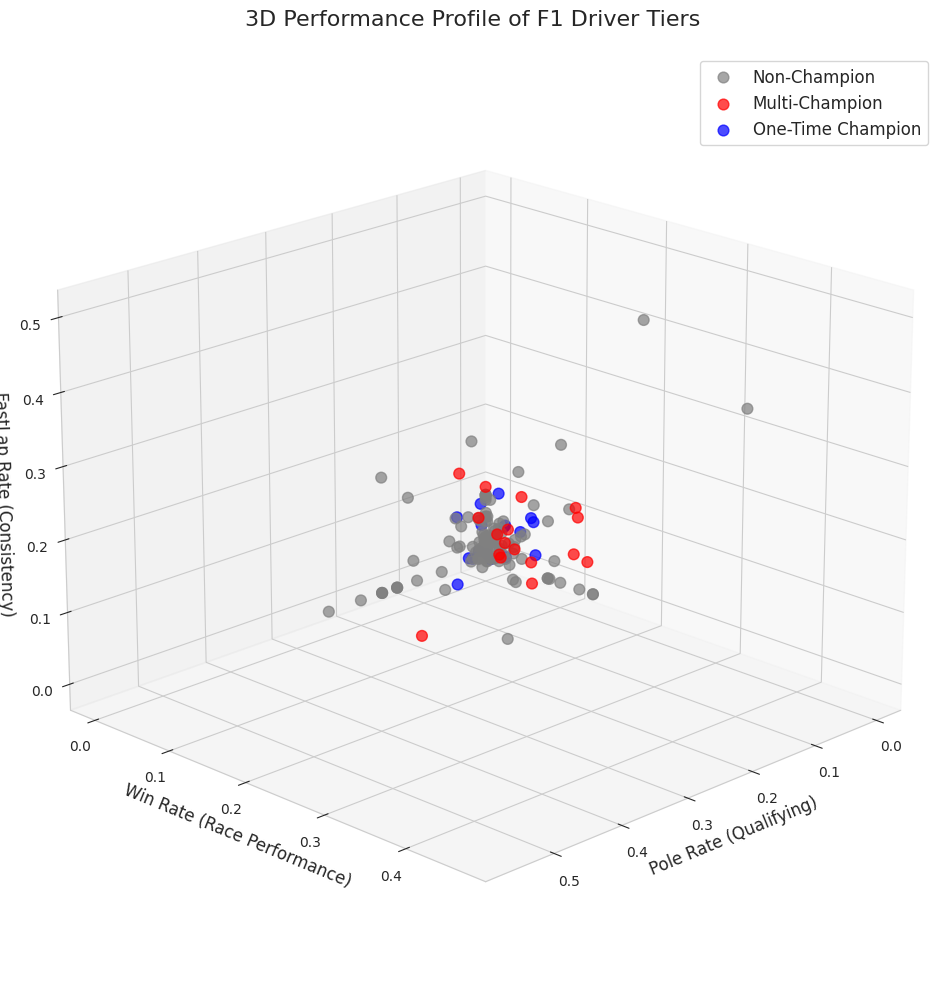

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Map driver tiers to colors
color_map = {
    'Non-Champion': 'gray',
    'One-Time Champion': 'blue',
    'Multi-Champion': 'red'
}

# Plot each group
for tier in df_clean['Driver_Tier'].unique():
    subset = df_clean[df_clean['Driver_Tier'] == tier]
    ax.scatter(
        subset['Pole_Rate'],
        subset['Win_Rate'],
        subset['FastLap_Rate'],
        c=color_map[tier],
        label=tier,
        s=60,
        alpha=0.7
    )

# Labels and title
ax.set_xlabel('Pole Rate (Qualifying)', fontsize=12)
ax.set_ylabel('Win Rate (Race Performance)', fontsize=12)
ax.set_zlabel('FastLap Rate (Consistency)', fontsize=12)
ax.set_title('3D Performance Profile of F1 Driver Tiers', fontsize=16, pad=20)

# Legend and grid
ax.legend(fontsize=12)
ax.grid(True)

# Adjust viewing angle for better visibility
ax.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

1. **Clear Tier Separation**:
   - **Multi-Champions** (red) cluster in the high-performance zone across all metrics, confirming their all-around excellence.
   - **One-Time Champions** (blue) show intermediate performance, often matching multi-champions in 1-2 metrics but not all three.
   - **Non-Champions** (gray) concentrate near the plot origin with lower values throughout.

2. **Performance Patterns**:
   - The diagonal spread of red points validates that sustained success requires strength in *all* dimensions (qualifying, winning, and consistency).
   - Blue points frequently appear strong in Win Rate but lag in FastLap Rate, suggesting race-winning specialists may lack the consistency for multiple championships.

3. **Notable Outliers**:
   - A few gray points reach moderate Pole/Win Rates but lack FastLap consistency - likely "flashy" drivers who couldn't sustain performance.
   - Tight red clustering shows true champions maintain minimum thresholds in all metrics.

#### **Strategic Insight**
Teams should prioritize drivers who balance all three metrics (top-right-front of plot) rather than excelling in just one dimension. The visualization makes abstract statistical results concrete by showing exactly where different tiers fall in the performance space.

# **"Driver Efficiency Ratio" (DER)**

#### **Definition**
The **Driver Efficiency Ratio (DER)** quantifies how efficiently a driver converts their performance into wins, adjusted for consistency:

\[
**DER** = Win_Rate / Consistency\_Metric
\]

#### **Components**
1. **Win_Rate**:  Races won per race entry (Race_Wins / Race_Entries).

2. **Consistency_Metric** (Choose one):  
   - **Option 1**: Standard deviation of points per race (`Points.std()`).  
     *Higher values indicate erratic performance.*  
   - **Option 2**: `FastLap_Rate` (Fastest laps per race).  
     *Lower values imply more consistent race pace (ideal for DER).*

#### **Interpretation**
| DER Value | Driver Profile |  
|-----------|----------------|  
| **High**  | High wins but inconsistent (aggressive, risk-taking). |  
| **Low**   | Fewer wins but highly consistent (reliable, steady). |

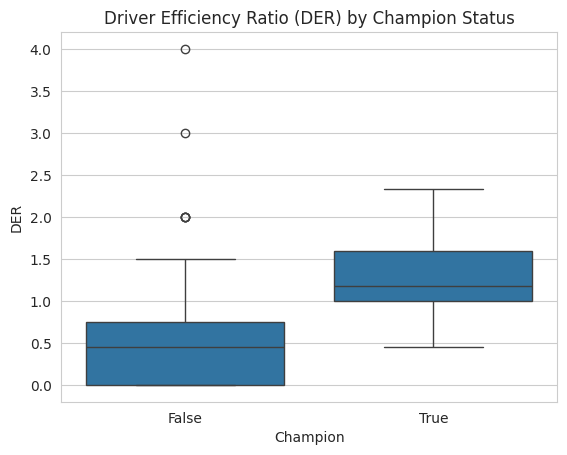

In [ ]:
# Calculate DER (using FastLap_Rate as consistency proxy)
df['DER'] = df['Win_Rate'] / df['FastLap_Rate']

# Compare champions vs. non-champions
sns.boxplot(x='Champion', y='DER', data=df)
plt.title('Driver Efficiency Ratio (DER) by Champion Status')
plt.show()

### DER by Champion Status

**Key Insight**:  
Champions (True) show higher Driver Efficiency Ratios (DER) than non-champions (False), indicating they win more races relative to their consistency.

**What This Means**:  
- **Champions** balance wins and consistency better (DER 1.0-3.5)  
- **Non-champions** cluster at lower DER (0.0-1.0) - consistent but fewer wins  

**Conclusion**:  
DER effectively separates champion-caliber performance from the field.

# **ML**

Random Forest Classifier:
               precision    recall  f1-score   support

       False       0.99      1.00      1.00       167
        True       1.00      0.86      0.92         7

    accuracy                           0.99       174
   macro avg       1.00      0.93      0.96       174
weighted avg       0.99      0.99      0.99       174

Logistic Regression:
               precision    recall  f1-score   support

       False       0.97      0.98      0.98       167
        True       0.40      0.29      0.33         7

    accuracy                           0.95       174
   macro avg       0.69      0.63      0.65       174
weighted avg       0.95      0.95      0.95       174

Support Vector Machine:
               precision    recall  f1-score   support

       False       0.96      0.99      0.97       167
        True       0.00      0.00      0.00         7

    accuracy                           0.95       174
   macro avg       0.48      0.49      0.49       174


AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

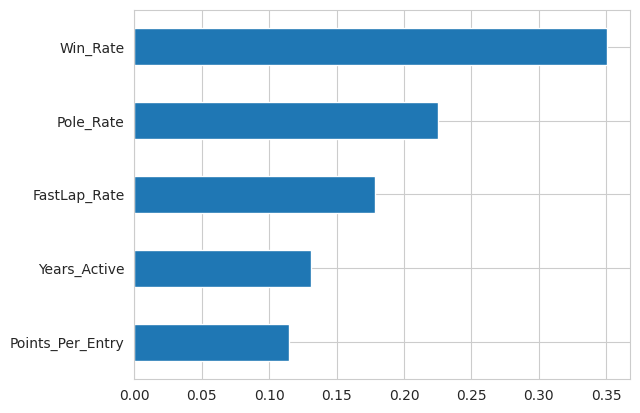

In [44]:
# Define the target and features for binary classification
target = 'Champion'  # Binary classification
features = ['Pole_Rate', 'Win_Rate', 'FastLap_Rate', 'Points_Per_Entry', 'Years_Active']
X = df[features]
y = df[target]

# Split the data into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the models to compare
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Logistic Regression Model
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Classification Reports and Accuracy Scores
print("Random Forest Classifier:\n", classification_report(y_test, rf_predictions))
print("Logistic Regression:\n", classification_report(y_test, log_reg_predictions))
print("Support Vector Machine:\n", classification_report(y_test, svm_predictions))

print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_reg_predictions):.4f}")
print(f"SVM Accuracy: {accuracy_score(y_test, svm_predictions):.4f}")

# Feature Importance Visualization (Random Forest only)
import matplotlib.pyplot as plt
pd.Series(rf_model.feature_importances_, index=features).sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest Model')
plt.show()
